# Simple Optical Character Recognition (OCR) using PyTesseract

OCR is a sub-field of Computer Vision. The main task when using OCR is to recognize character from an input image. Google's Tesseract-OCR Engine is the most popular and accurate library for OCR. The last release included LSTM (Long Short Term Memory), the same technical used for Natural Language Process. It has improved the results considerably.

The models from Tesseract was trained over more then 135 languages with different alphabets, it allows us to deploy OCR for many languages. Python-tesseract is a wrapper for Google’s Tesseract-OCR Engine, as defined in their [website](https://pypi.org/project/pytesseract/). The library offers to us some practical functions as:

- **get_languages** Returns all currently supported languages by Tesseract OCR.
- **get_tesseract_version** Returns the Tesseract version installed in the system.
- **image_to_string** Returns unmodified output as string from Tesseract OCR processing
- **image_to_boxes** Returns result containing recognized characters and their box boundaries
- **image_to_data** Returns result containing box boundaries, confidences, and other information. Requires Tesseract 3.05+. For more information, please check the [Tesseract TSV documentation](https://github.com/tesseract-ocr/tessdoc})
- **image_to_osd** Returns result containing information about orientation and script detection.
- **image_to_alto_xml** Returns result in the form of Tesseract’s ALTO XML format.
- **run_and_get_output** Returns the raw output from Tesseract OCR. Gives a bit more control over the parameters that are sent to tesseract.

To more details about the parameters, [see](https://pypi.org/project/pytesseract/).

In this example, we consider images from commercial cards and a poem by Edgar Allan Poe. We'll use the function **image_to_string** to extract the text. The ideal of this example is also to show some limitations of OCR engines.

## Importing Libraries

In [1]:
from imutils import paths
import cv2 as cv
import pytesseract
import matplotlib.pyplot as plt

##  Setting the dataset

In [2]:
dataset = 'dataset'
pathImages = list(paths.list_images(dataset))

## Visualizing the images

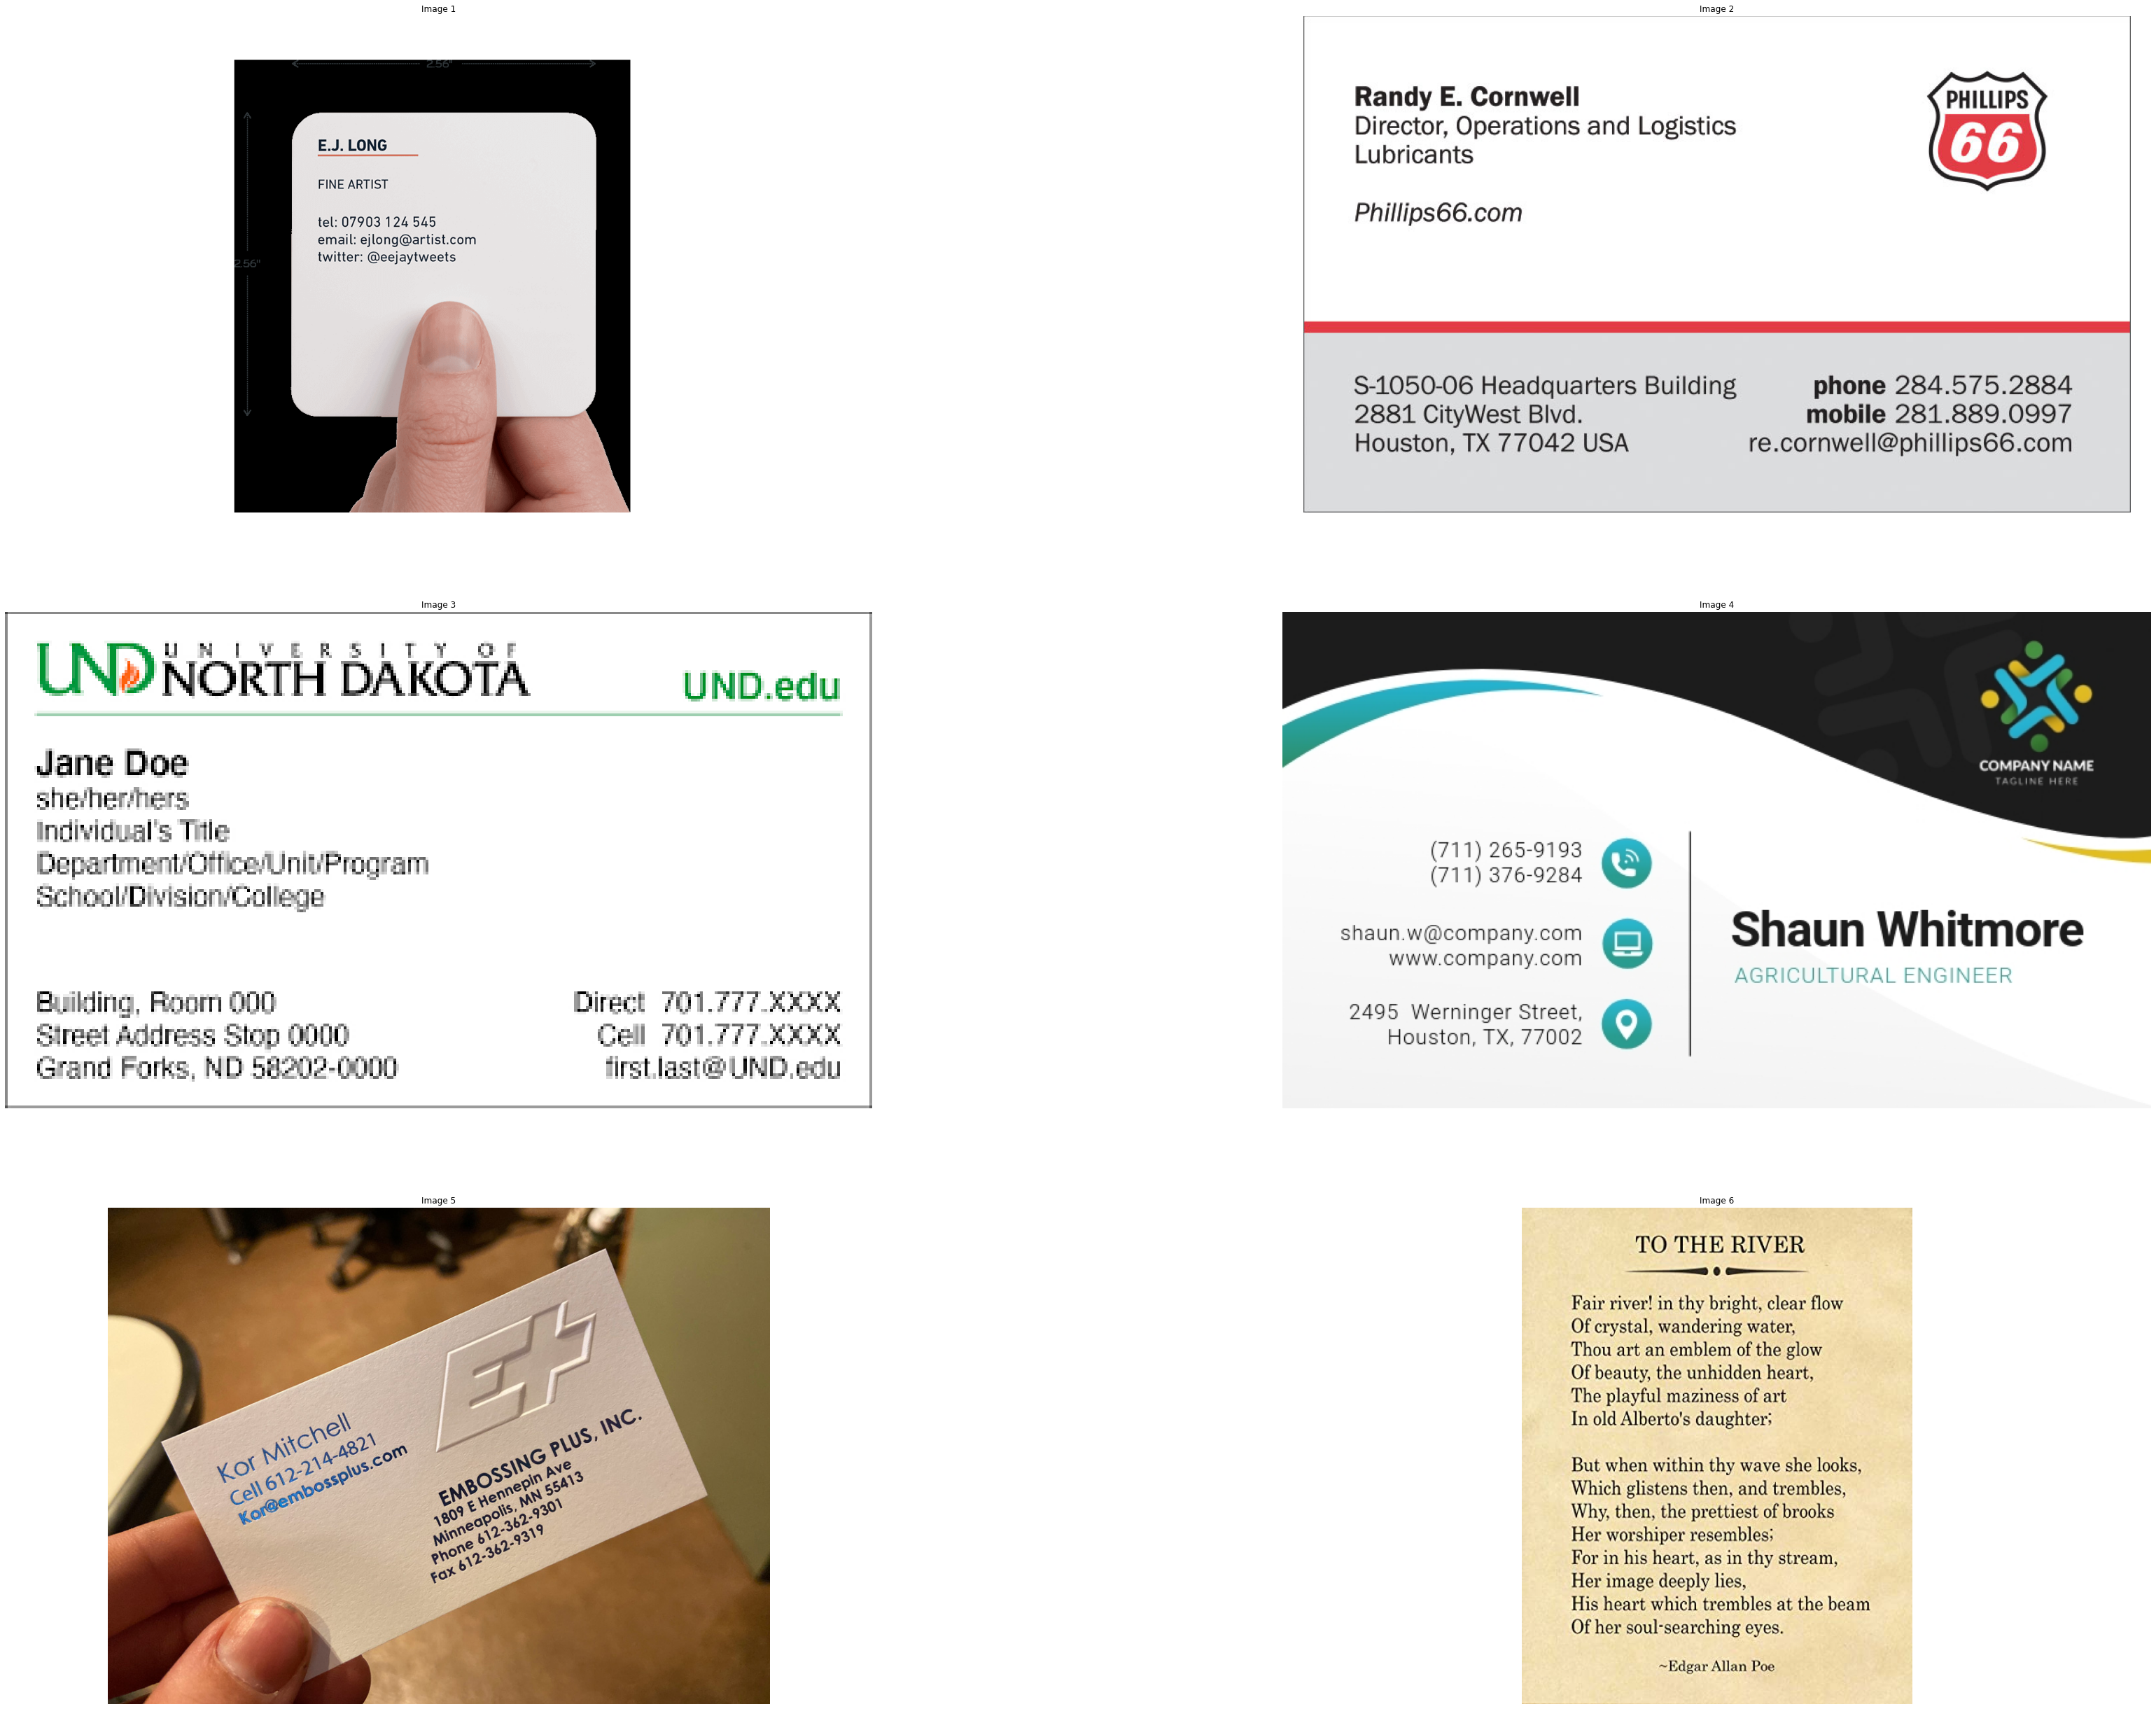

In [3]:
plt.figure(figsize=(60, 60))
count = 1
for i in pathImages:
    ax = plt.subplot(4, 2, count)
    plt.imshow(cv.cvtColor(cv.imread(i), cv.COLOR_BGR2RGB))
    plt.title('Image {:d}'.format(count))
    plt.axis("off")
    count += 1
plt.show()

## OCR'ing the images

To apply the OCR function we follow these steps:

- Create an empty list to store the extracted texts
- Read the image from disk using OpenCV
- Convert the loaded image into RGB order
- Apply **image_to_string**
- Store the text

In [4]:
out_text = [] # empty list to store the extracted text
for i in pathImages:
    image = cv.imread(i) # reading the image
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB) # converting into rgb
    text = pytesseract.image_to_string(image) # applying the ocr
    out_text.append(text) # storing the text

## Results

E.J. LONG

FINE ARTIST

tel: 07903 124 545
email: ejlong@artist.com
twitter: @eejaytweets

 



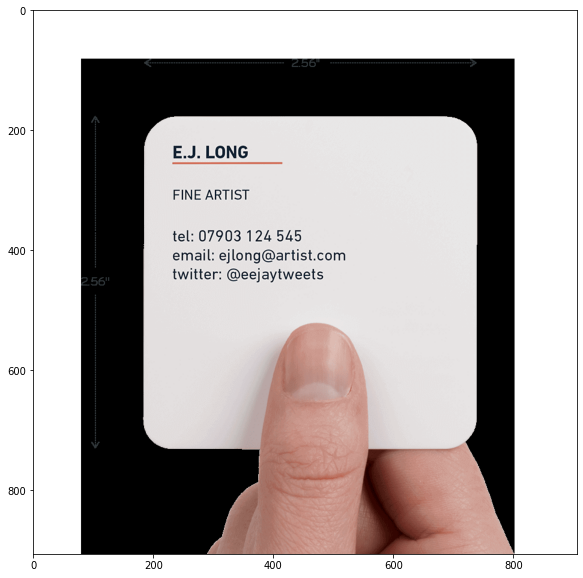

In [5]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[0]), cv.COLOR_BGR2RGB))
print(out_text[0])

 

 

Randy E. Cornwell PHILLIPS
Director, Operations and Logistics

 

Lubricants

Phillips66.com

S-1050-06 Headquarters Building phone 284.575.2884
2881 CityWest Blvd. mobile 281.889.0997

Houston, TX 77042 USA re.cornwell@phillips66.com

 

 



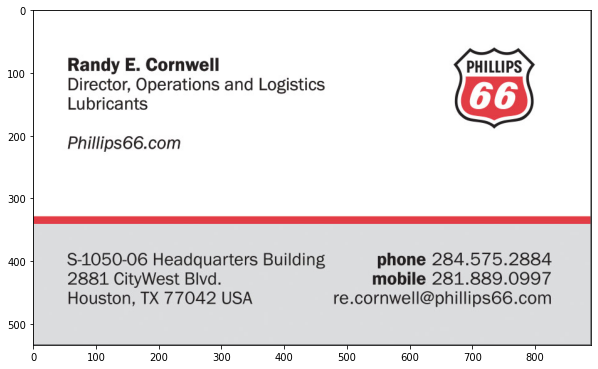

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[1]), cv.COLOR_BGR2RGB))
print(out_text[1])

 

 

UNDNorTH DAKOTA UND.edu

Jane Doe
Shetherners

Inaiiguals Te
DopartmentOticetuntyProgram
SchoalDivsionCallege

ulin, Room 000 Direct 701.77 000K
Sieet Address Stop 0000 (Gel 701.777 XXX
(Gana Frks, ND 58202-0000 "istlast@UND.eo

 

 



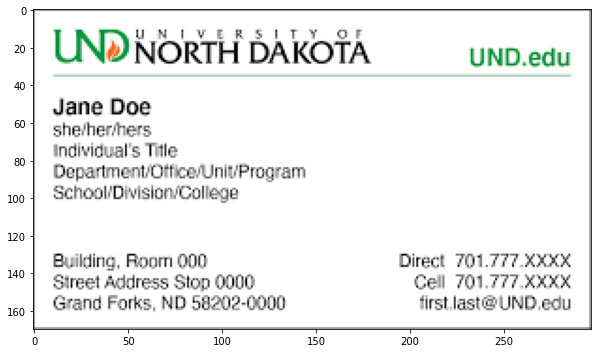

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[2]), cv.COLOR_BGR2RGB))
print(out_text[2])

e
%

Ud

 

(711) 265-9193
(711) 376-9284

shaun.w@company.com Shaun Whitmore

www.company.com my

2495 Werninger Street,
Houston, TX, 77002



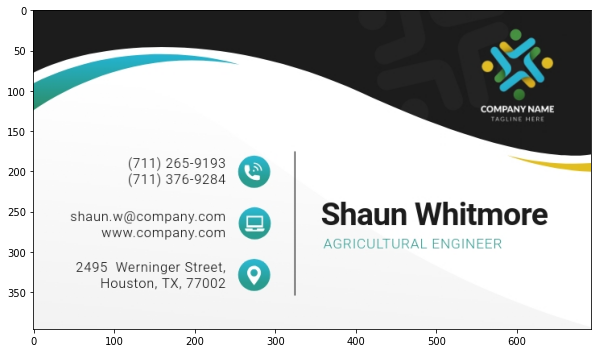

In [8]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[3]), cv.COLOR_BGR2RGB))
print(out_text[3])

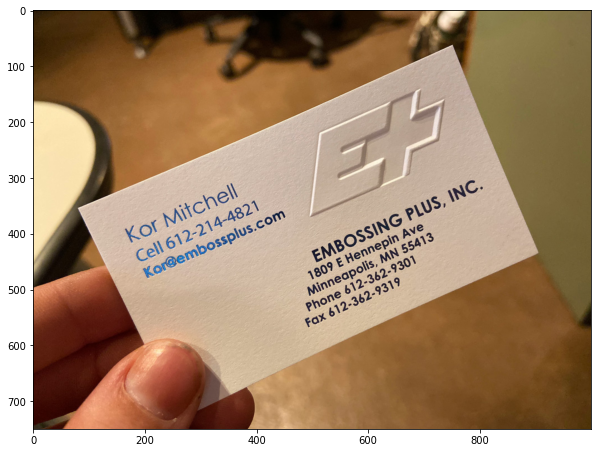

In [9]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[-2]), cv.COLOR_BGR2RGB))
print(out_text[-2])

TO THE RIVER

 

 

Fair river! in thy bright, clear flow
Of crystal, wandering water,

Thou art an emblem of the glow

Of beauty, the unhidden heart,
The playful maziness of art

In old Alberto's daughter;

But when within thy wave she looks,
Which glistens then, and trembles,
Why, then, the prettiest of brooks

Her worshiper resembles;

For in his heart, as in thy stream,
Her image deeply lies,

His heart which trembles at the beam
Of her soul-searching eyes.

~Edgar Allan Poe



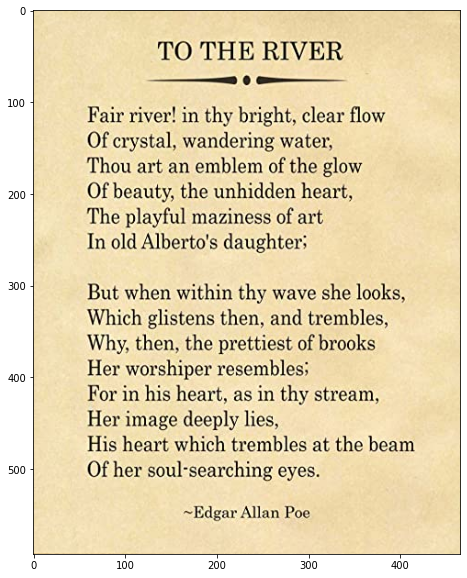

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(cv.cvtColor(cv.imread(pathImages[-1]), cv.COLOR_BGR2RGB))
print(out_text[-1])

## Conclusions

The simple OCR function **image_to_string** worked well for most examples. In the two first examples, we have images clear, without a complex background, we can consider these images well preprocessed. For this reason, the OCR'ing process was able to extract the text. 

On the other hand, for the image 3 and 4, the OCR'ing process found difficult to reach a good results. First of all, the image 3 is a little bit blurred and, the text does not have a good resolution. The figure 4 shows better resolutions, but it has figures, shapes and color variations, these elements put difficult during the recognition.

The figure was the worse result, due to a complex background, the OCR method was not capable to recognize characters. To finish, the poem To The River by Edgar Allan Poe, is a good image, with simple background and good resolution for the letters. The extraction was pretty well, the only observation is, the strophes was not respected. The reason for it is, leak of preprocessing.

In summary, the OCR methods work well provided a good preprocessed image.